In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import re

In [5]:
df = pd.read_excel("E:\AxionRay Assessment\DA - Task 1..xlsx")

<>:1: SyntaxWarning: invalid escape sequence '\A'
<>:1: SyntaxWarning: invalid escape sequence '\A'
C:\Users\Gourav Banjara\AppData\Local\Temp\ipykernel_2552\4005940447.py:1: SyntaxWarning: invalid escape sequence '\A'
  df = pd.read_excel("E:\AxionRay Assessment\DA - Task 1..xlsx")


In [4]:
df.head()
df.columns

Index(['VIN', 'TRANSACTION_ID', 'CORRECTION_VERBATIM', 'CUSTOMER_VERBATIM',
       'REPAIR_DATE', 'CAUSAL_PART_NM', 'GLOBAL_LABOR_CODE_DESCRIPTION',
       'PLATFORM', 'BODY_STYLE', 'VPPC', 'PLANT', 'BUILD_COUNTRY',
       'LAST_KNOWN_DLR_NAME', 'LAST_KNOWN_DLR_CITY', 'REPAIRING_DEALER_CODE',
       'DEALER_NAME', 'REPAIR_DLR_CITY', 'STATE', 'DEALER_REGION',
       'REPAIR_DLR_POSTAL_CD', 'REPAIR_AGE', 'KM', 'COMPLAINT_CD_CSI',
       'COMPLAINT_CD', 'VEH_TEST_GRP', 'COUNTRY_SALE_ISO',
       'ORD_SELLING_SRC_CD', 'OPTN_FAMLY_CERTIFICATION',
       'OPTF_FAMLY_EMISSIOF_SYSTEM', 'GLOBAL_LABOR_CODE',
       'TRANSACTION_CATEGORY', 'CAMPAIGN_NBR', 'REPORTING_COST', 'TOTALCOST',
       'LBRCOST', 'ENGINE', 'ENGINE_DESC', 'TRANSMISSION', 'TRANSMISSION_DESC',
       'ENGINE_SOURCE_PLANT', 'ENGINE_TRACE_NBR', 'TRANSMISSION_SOURCE_PLANT',
       'TRANSMISSION_TRACE_NBR', 'SRC_TXN_ID', 'SRC_VER_NBR',
       'TRANSACTION_CNTR', 'MEDIA_FLAG', 'VIN_MODL_DESGTR', 'LINE_SERIES',
       'LAST_KNOWN_D

Changing Required Data Types

In [ ]:
df = df.astype({'TRANSACTION_ID':'Int64',
           'REPAIR_DATE':'datetime64[ns]',
           'REPAIR_AGE':'Int64',
           'KM':'Int64',
           'ORD_SELLING_SRC_CD':'Int64',
           'GLOBAL_LABOR_CODE':'Int64',
           'REPORTING_COST':'float',
           'TOTALCOST':'float',
           'LBRCOST':'float',
           'LAST_KNOWN_DELVRY_TYPE_CD':'Int64',
           })
df['REPAIR_DATE'].dtype

dtype('<M8[ns]')

In [ ]:
df['REPAIR_DATE'] = df['REPAIR_DATE'].dt.date

Checking Distribution and counting unique values

In [89]:
df['TRANSACTION_ID'].nunique()
df.describe()

,TRANSACTION_ID,REPAIR_DATE,DEALER_REGION,REPAIR_AGE,KM,COMPLAINT_CD_CSI,ORD_SELLING_SRC_CD,GLOBAL_LABOR_CODE,REPORTING_COST,TOTALCOST,LBRCOST,TRANSMISSION_SOURCE_PLANT,SRC_TXN_ID,SRC_VER_NBR,TRANSACTION_CNTR,LAST_KNOWN_DELVRY_TYPE_CD,NON_CAUSAL_PART_QTY,SALES_REGION_CODE
count,100.000000,100,100.00000,100.000000,100.000000,100.0,100.000000,100.000000,100.000000,100.000000,100.000000,8.800000e+01,1.000000e+02,100.000000,100.0,98.000000,100.000000,100.00000
mean,13036.900000,2024-01-22 07:26:24,1.09000,14.940000,24914.230000,0.0,24.590000,251.900000,531.193200,561.162128,106.344900,1.676383e+08,2.815767e+09,5.720000,1.0,14.132653,0.070000,1.09000
min,13021.000000,2024-01-02 00:00:00,1.00000,0.000000,3.000000,0.0,11.000000,20.000000,27.690000,27.690000,20.000000,2.878270e+05,2.808842e+09,2.000000,1.0,10.000000,0.000000,1.00000
25%,13027.750000,2024-01-12 00:00:00,1.00000,5.000000,8883.250000,0.0,13.000000,130.000000,305.432500,349.940000,61.855000,2.878270e+05,2.809436e+09,4.000000,1.0,10.000000,0.000000,1.00000
50%,13036.000000,2024-01-24 12:00:00,1.00000,12.000000,21962.000000,0.0,13.000000,130.000000,433.970000,463.360000,78.560000,8.042172e+06,2.820097e+09,4.000000,1.0,10.000000,0.000000,1.00000
75%,13041.250000,2024-02-01 00:00:00,1.00000,21.000000,35493.250000,0.0,48.000000,130.000000,554.062500,572.772500,108.055000,1.774929e+07,2.820880e+09,6.000000,1.0,16.000000,0.000000,1.00000
max,13081.000000,2024-02-07 00:00:00,4.00000,50.000000,107905.000000,0.0,72.000000,2400.000000,2457.450000,3205.450000,1012.670000,8.282984e+08,2.823000e+09,26.000000,1.0,37.000000,1.000000,4.00000
std,12.028166,NaN,0.51434,12.367945,20747.078206,0.0,17.822976,546.451722,411.161608,438.861275,113.223074,3.237538e+08,5.790727e+06,4.040402,0.0,6.694570,0.256432,0.51434


Removing all the unnecessary symbols, like (向盘, "????")


In [ ]:
df = df.applymap(
    lambda x: re.sub(r'[^a-zA-Z0-9\s\-/]', '', str(x)) if isinstance(x, str) else x )

C:\Users\Gourav Banjara\AppData\Local\Temp\ipykernel_22976\665869239.py:1: FutureWarning: DataFrame.applymap has been deprecated. Use DataFrame.map instead.
  df = df.applymap(


Replacing empty values with NaN 

In [ ]:
df['TRANSMISSION_TRACE_NBR'] = df['TRANSMISSION_TRACE_NBR'].apply(
    lambda x: np.nan if str(x).strip() == '' else x
)

In [91]:
df.replace("NONE", np.nan, inplace=True)

Deleting Unnecessary/Empty column

In [ ]:
df = df.drop('CAMPAIGN_NBR', axis=1)
    

In [78]:
df['TRANSMISSION_TRACE_NBR'].isna()

0     False
1     False
2      True
3     False
4     False
      ...  
95    False
96     True
97    False
98    False
99    False
Name: TRANSMISSION_TRACE_NBR, Length: 100, dtype: bool

Replacing  NaN values in a numerical column using imputation

In [88]:
df['TOTALCOST'].isna().sum()
df['TOTALCOST'].mean()
df['TOTALCOST'] = df['TOTALCOST'].fillna(df['TOTALCOST'].mean())

Keeping values limited to two decimal points

In [120]:
df[['REPORTING_COST', 'TOTALCOST','LBRCOST']] = df[['REPORTING_COST', 'TOTALCOST','LBRCOST']].round(2)

Handling Case and Whitespaces

In [110]:
df['CUSTOMER_VERBATIM'] = df['CUSTOMER_VERBATIM'].str.lower().str.strip()
df['CORRECTION_VERBATIM'] = df['CORRECTION_VERBATIM'].str.lower().str.strip()

Generating Tags

In [180]:
Root_Cause = ['coming apart', ' coming of', 'heated', 'inoperable', 'intermittently',"isn't working", 'not working', "dosen't work",
              'noise', 'sticking up', 'lifting up', 'loose', 'leak','crack','cracked','vibration','broken','does no work','stitching','peeling'
              ,'bubbling','turns of','damaged','trim']
Root_Component = ['horn','warning light','assist light','light','wiper','electric system','assist system','dash','switch','volan',
                  'supercruise','steering wheel']

In [199]:
def annotation(Text):
    for i in Root_Cause:
        if i in Text:
            return i
    else:
        return 'Not Mentioned'
    
def annotation2(Text):
    for i in Root_Component:
        if i in Text:
            return i
    else:
        return 'Not Mentioned'

df['Root_Cause'] = df['CUSTOMER_VERBATIM'].apply(annotation)
df['Root_Component'] = df['CUSTOMER_VERBATIM'].apply(annotation2)

In [201]:
df['Root_Cause'].value_counts()
# df['Root_Component'].value_counts()

Root_Cause
Not Mentioned     26
heated            18
coming apart      12
loose              9
peeling            7
 coming of         5
trim               4
bubbling           3
noise              3
stitching          2
turns of           2
not working        2
does no work       1
crack              1
sticking up        1
intermittently     1
inoperable         1
damaged            1
lifting up         1
Name: count, dtype: int64

Finding Outliers

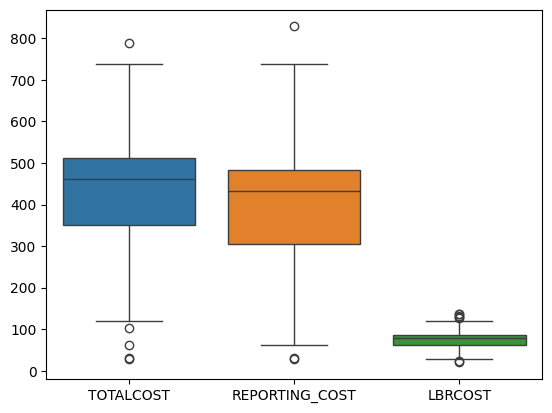

In [104]:
sns.boxplot(data=df[['TOTALCOST','REPORTING_COST','LBRCOST']])
plt.savefig('boxplot1.png')

Replacing Outliers

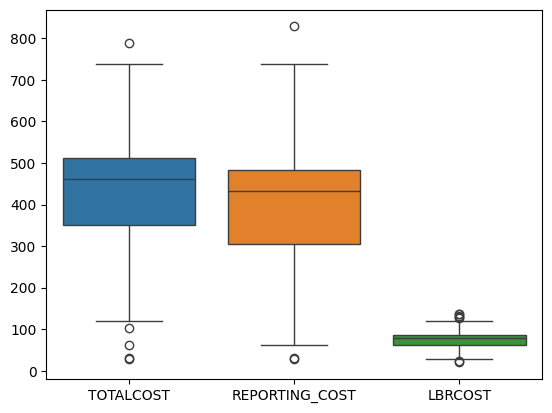

In [ ]:
q1 = df['LBRCOST'].quantile(0.25)
q3 = df['LBRCOST'].quantile(0.75)
iqr = q3 - q1

lower_values = q1 - 1.5 * iqr
higher_values = q3 + 1.5 * iqr

average = df['LBRCOST'].median()

df['LBRCOST'] = df['LBRCOST'].apply(
    lambda x: average if x < lower_values or x > higher_values else x
)

sns.boxplot(data = df[['TOTALCOST','REPORTING_COST','LBRCOST']])
plt.savefig('bxplot2.png')

In [212]:
df.fillna('NaN').to_excel('Gourav_Task_2.xlsx', index=False)

Creating Visuals

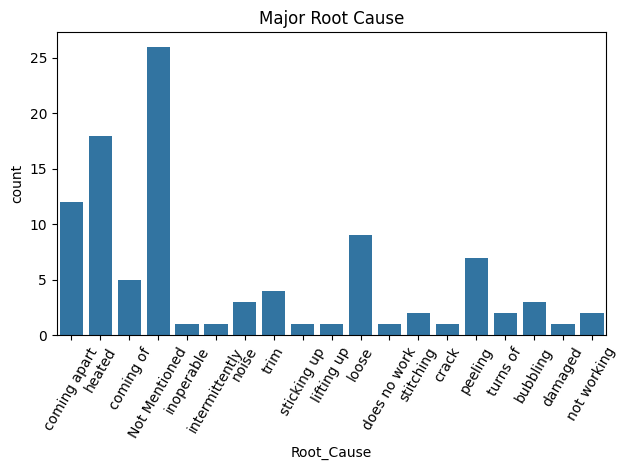

In [207]:
# sns.countplot(x='Root_Component', data = df)
# plt.title('Major Component in Problem')
# plt.savefig('Major_Component_in_Problem.png')

sns.countplot(x='Root_Cause', data = df)
plt.title("Major Root Cause")
plt.savefig("Major_Root_cause.png")

plt.xticks(rotation= 60)
plt.tight_layout()

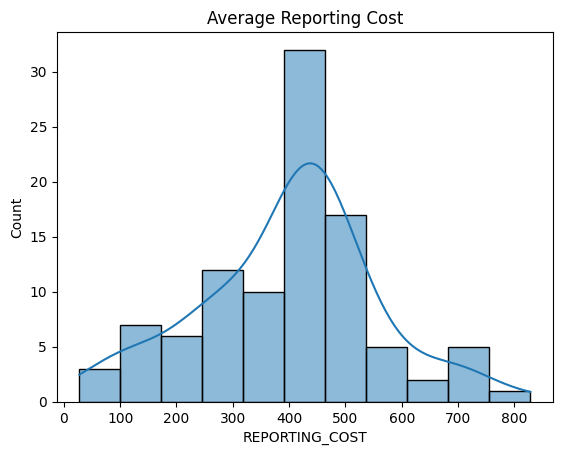

In [211]:
sns.histplot(df['REPORTING_COST'], kde=True)
plt.title('Average Reporting Cost')
plt.savefig('Average_Reporting_cost.png')

Displaying relationship between Total_cost, Reporting_cost, LBR_cost

In [ ]:

corr = df[['TOTALCOST', 'REPORTING_COST', 'LBRCOST']].corr()
sns.heatmap(corr, annot=True, cmap='YlGnBu')
plt.title('Correlation Heatmap of Total, Reporting and LBR Cost')
plt.savefig("Correlation_heatmap_of_total_reporting_and_LBR_cost.png")

NameError: name 'df' is not defined

Text(0.5, 1.0, 'Average Range of KMs Travelled')

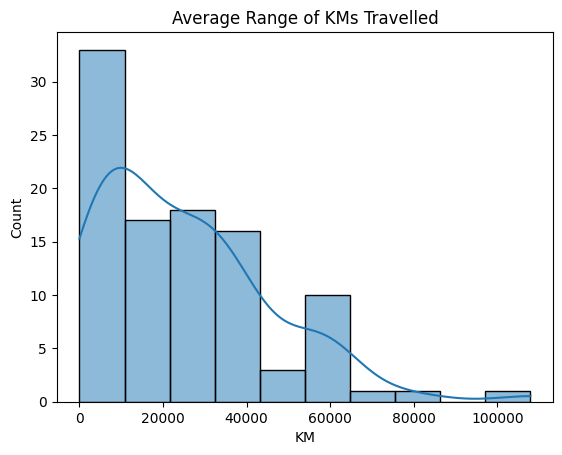

In [209]:
sns.histplot(df['KM'], kde=True)
plt.title('Average Range of KMs Travelled')

Text(0.5, 1.0, 'Count Of Platforms')

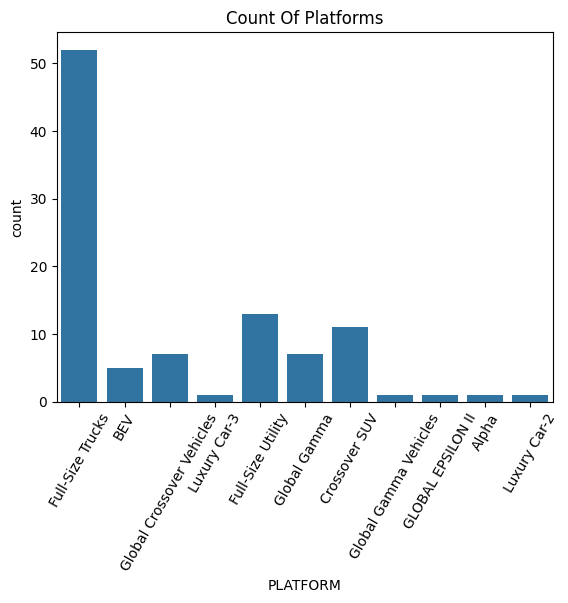

In [158]:
sns.countplot(x='PLATFORM', data=df)
plt.xticks(rotation=60)
plt.title('Count Of Platforms')

Displaying Repair Age per Engine

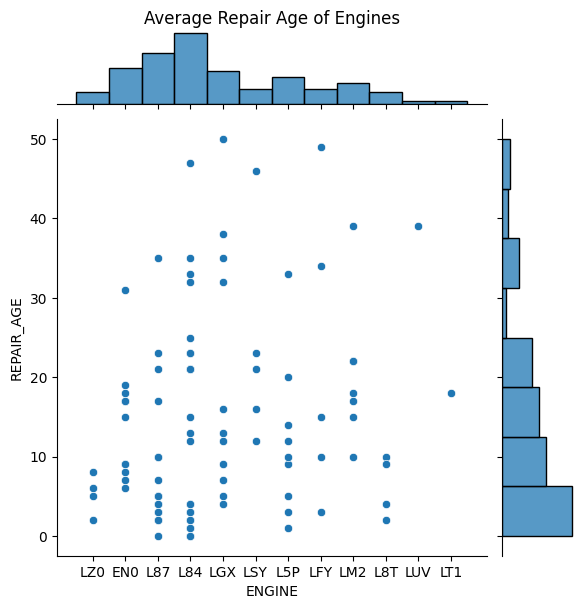

In [208]:
sns.jointplot(x='ENGINE', y='REPAIR_AGE', data = df)
plt.title('Average Repair Age of Engines', y=1.2)
plt.savefig("Average_Repair_age_of_Engines.png")